In [42]:
import pandas as pd
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import numpy as np

In [43]:
df = pd.read_csv('Resources/data3_load_assault_group_to_ML.csv')
df.head()

,Unnamed: 0,Booking_year_month,DOB_month,total_crime,total_crime_3,age<25_3,age26-50_3,age>50_3,day_of_week_Monday_3,day_of_week_Tuesday_3,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
0,3,2015-08,1013,153,14.0,3.0,7.0,4.0,0.0,0.0,...,23.0,21.0,14.0,142.0,0.0,0.0,0.0,13.0,52.0,77.0
1,4,2015-09,803,121,132.0,13.0,91.0,28.0,22.0,13.0,...,18.0,22.0,32.0,153.0,0.0,0.0,0.0,14.0,43.0,96.0
2,5,2015-10,1057,156,142.0,18.0,92.0,32.0,14.0,13.0,...,13.0,10.0,16.0,121.0,0.0,0.0,0.0,11.0,44.0,66.0
3,6,2015-11,774,114,153.0,15.0,112.0,26.0,24.0,17.0,...,18.0,26.0,23.0,0.0,0.0,0.0,156.0,10.0,46.0,100.0
4,7,2015-12,891,129,121.0,11.0,84.0,26.0,13.0,22.0,...,13.0,17.0,8.0,0.0,0.0,0.0,114.0,5.0,42.0,67.0


In [44]:
# Drop innecesary columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [45]:
# Add column of integers 
df['date_index'] = np.arange(len(df))+1

In [46]:
df.drop(['Booking_year_month'], axis=1, inplace=True)

In [47]:
df.columns

Index(['DOB_month', 'total_crime', 'total_crime_3', 'age<25_3', 'age26-50_3',
       'age>50_3', 'day_of_week_Monday_3', 'day_of_week_Tuesday_3',
       'day_of_week_Wednesday_3', 'day_of_week_Thursday_3',
       'day_of_week_Friday_3', 'day_of_week_Saturday_3',
       'day_of_week_Sunday_3', 'summer_3', 'spring_3', 'winter_3', 'autum_3',
       'CityRN_FOREIGN_3', 'CityRN_HOMELESS_3', 'CityRN_MIAMI_3',
       'total_crime_2', 'Age<25_2', 'Age26-50_2', 'Age>50_2',
       'day_of_week_Monday_2', 'day_of_week_Tuesday_2',
       'day_of_week_Wednesday_2', 'day_of_week_Thursday_2',
       'day_of_week_Friday_2', 'day_of_week_Saturday_2',
       'day_of_week_Sunday_2', 'summer_2', 'spring_2', 'winter_2', 'autum_2',
       'CityRN_FOREIGN_2', 'CityRN_HOMELESS_2', 'CityRN_MIAMI_2',
       'total_crime_1', 'age<25_1', 'age26-50_1', 'age>50_1',
       'day_of_week_Monday_1', 'day_of_week_Tuesday_1',
       'day_of_week_Wednesday_1', 'day_of_week_Thursday_1',
       'day_of_week_Friday_1', 'day_

In [48]:
df.head()

,DOB_month,total_crime,total_crime_3,age<25_3,age26-50_3,age>50_3,day_of_week_Monday_3,day_of_week_Tuesday_3,day_of_week_Wednesday_3,day_of_week_Thursday_3,...,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1,date_index
0,1013,153,14.0,3.0,7.0,4.0,0.0,0.0,0.0,0.0,...,21.0,14.0,142.0,0.0,0.0,0.0,13.0,52.0,77.0,1
1,803,121,132.0,13.0,91.0,28.0,22.0,13.0,23.0,24.0,...,22.0,32.0,153.0,0.0,0.0,0.0,14.0,43.0,96.0,2
2,1057,156,142.0,18.0,92.0,32.0,14.0,13.0,29.0,28.0,...,10.0,16.0,121.0,0.0,0.0,0.0,11.0,44.0,66.0,3
3,774,114,153.0,15.0,112.0,26.0,24.0,17.0,20.0,20.0,...,26.0,23.0,0.0,0.0,0.0,156.0,10.0,46.0,100.0,4
4,891,129,121.0,11.0,84.0,26.0,13.0,22.0,23.0,24.0,...,17.0,8.0,0.0,0.0,0.0,114.0,5.0,42.0,67.0,5


In [49]:
# Divide rows for training and testing 
train=df[0:43]
test=df[43:] 

In [50]:
X_train = train[['total_crime', 'total_crime_3', 'age<25_3', 'age26-50_3', 'age>50_3', 'day_of_week_Monday_3', 'day_of_week_Tuesday_3', 'day_of_week_Wednesday_3', \
       'day_of_week_Thursday_3', 'day_of_week_Friday_3', 'day_of_week_Saturday_3', 'day_of_week_Sunday_3', 'summer_3', 'spring_3', 'winter_3', 'autum_3', 'CityRN_FOREIGN_3', \
       'CityRN_HOMELESS_3', 'CityRN_MIAMI_3', 'total_crime_2', 'Age<25_2', 'Age26-50_2', 'Age>50_2', 'day_of_week_Monday_2', 'day_of_week_Tuesday_2', 'day_of_week_Wednesday_2', \
       'day_of_week_Thursday_2', 'day_of_week_Friday_2', 'day_of_week_Saturday_2', 'day_of_week_Sunday_2', 'summer_2', 'spring_2', 'winter_2', 'autum_2', 'CityRN_FOREIGN_2', \
       'CityRN_HOMELESS_2', 'CityRN_MIAMI_2', 'total_crime_1', 'age<25_1', 'age26-50_1', 'age>50_1', 'day_of_week_Monday_1', 'day_of_week_Tuesday_1', 'day_of_week_Wednesday_1', \
       'day_of_week_Thursday_1', 'day_of_week_Friday_1', 'day_of_week_Saturday_1', 'day_of_week_Sunday_1', 'summer_1', 'spring_1', 'winter_1', 'autum_1', 'CityRN_FOREIGN_1', \
       'CityRN_HOMELESS_1', 'CityRN_MIAMI_1']]
y_train = train["date_index"].values.reshape(-1, 1)
print(X.shape, y.shape)

(43, 57) (43, 1)


In [54]:
X_test = test[['total_crime', 'total_crime_3', 'age<25_3', 'age26-50_3', 'age>50_3', 'day_of_week_Monday_3', 'day_of_week_Tuesday_3', 'day_of_week_Wednesday_3', \
       'day_of_week_Thursday_3', 'day_of_week_Friday_3', 'day_of_week_Saturday_3', 'day_of_week_Sunday_3', 'summer_3', 'spring_3', 'winter_3', 'autum_3', 'CityRN_FOREIGN_3', \
       'CityRN_HOMELESS_3', 'CityRN_MIAMI_3', 'total_crime_2', 'Age<25_2', 'Age26-50_2', 'Age>50_2', 'day_of_week_Monday_2', 'day_of_week_Tuesday_2', 'day_of_week_Wednesday_2', \
       'day_of_week_Thursday_2', 'day_of_week_Friday_2', 'day_of_week_Saturday_2', 'day_of_week_Sunday_2', 'summer_2', 'spring_2', 'winter_2', 'autum_2', 'CityRN_FOREIGN_2', \
       'CityRN_HOMELESS_2', 'CityRN_MIAMI_2', 'total_crime_1', 'age<25_1', 'age26-50_1', 'age>50_1', 'day_of_week_Monday_1', 'day_of_week_Tuesday_1', 'day_of_week_Wednesday_1', \
       'day_of_week_Thursday_1', 'day_of_week_Friday_1', 'day_of_week_Saturday_1', 'day_of_week_Sunday_1', 'summer_1', 'spring_1', 'winter_1', 'autum_1', 'CityRN_FOREIGN_1', \
       'CityRN_HOMELESS_1', 'CityRN_MIAMI_1']]
y_test = test["date_index"].values.reshape(-1, 1)
print(X.shape, y.shape)

(43, 57) (43, 1)


In [55]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [56]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: -637.2829077640738


Text(0.5, 1.0, 'Residual Plot')

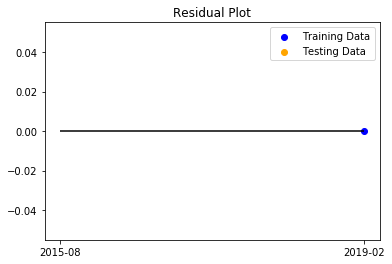

In [57]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION